# Clustering

* Clustering of unlabeled data can be performed with ` sklearn.cluster `
* Each clustering algorithm comes in two variant: a class, that implements the ` fit ` method to learn the cluster to train data, and a function, that given train data, return an array of integer labels corresponding to the different cluster. For the class, the labels over the training data can be found in the ` labels_ ` attribute.

## How to give Input Data

* Algorithms can take different kinds of matrix as input.
* All the methods accept the standard data matrices of shape `[n_samples, n_features] `. These can be obtained from sklearn.feature_extraction module.
* For `AffinityPropogation`, `SpectralClustering` and `DBSCAN` one can also input similarity matrices of shape `[n_samples, n_samples] `. These can be obtained from the function in the `sklearn.metrics.pairwise` module.

# Different Clustering Algorithms

* We see the different clustering algorithms
* Note:- Agglomerative clustering is also called as hierachical clustering

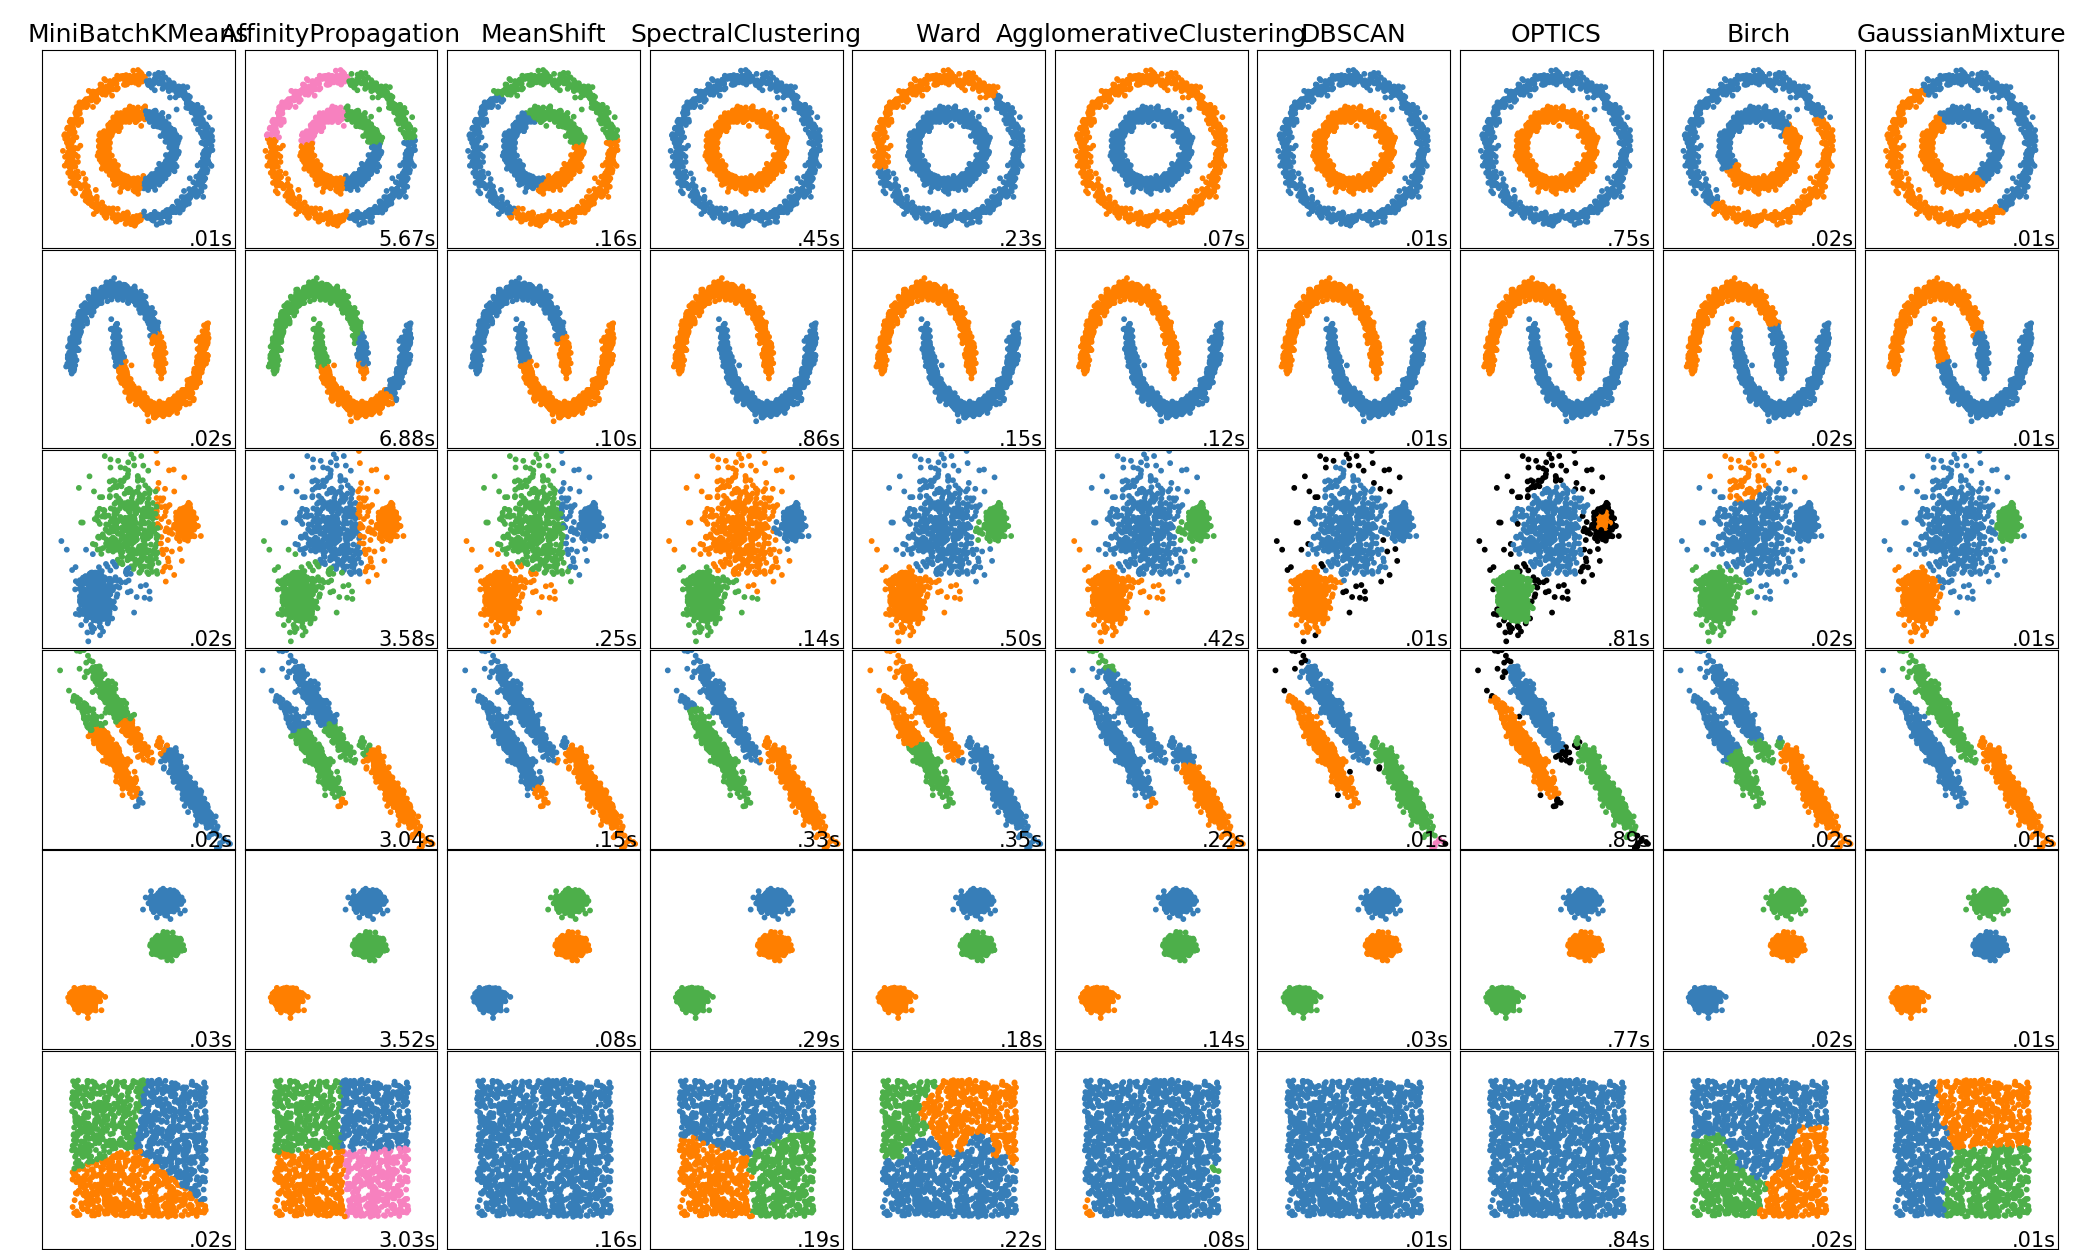

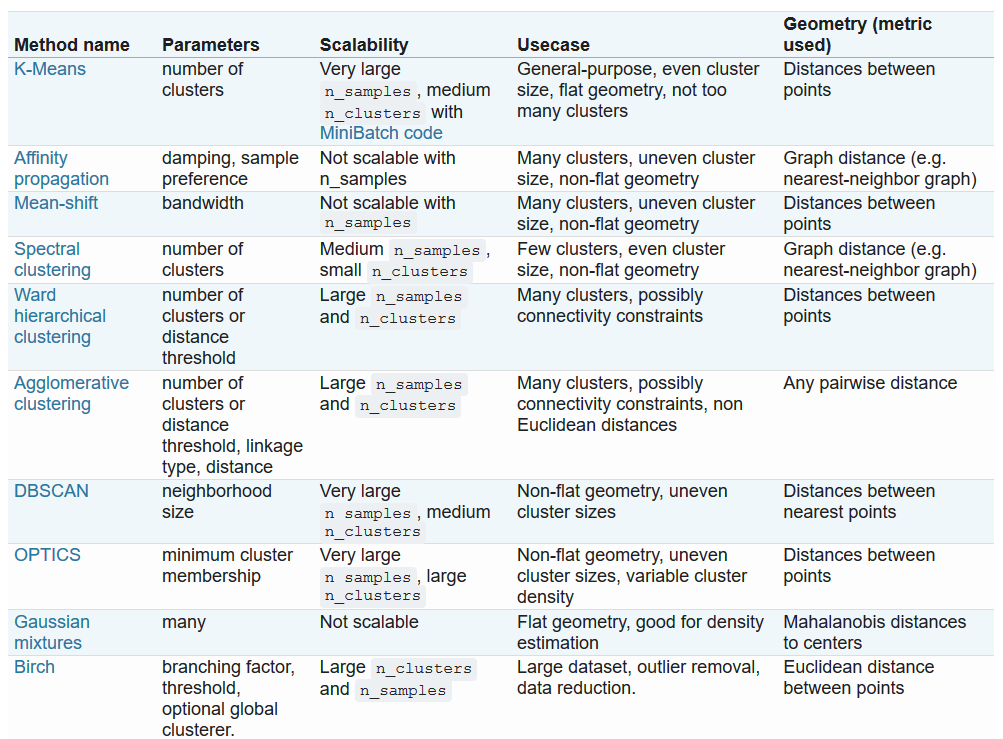

* Non flat geometry is useful when the clusters have a specific shape, i.e. non-flat manifold, and the standard euclidean distance is not the right metric.

* Gaussian mixture models will be discussed later.

* K-Means can be seen as a special case of Gaussian mixture as well.

# K-Means Clustering 

## Introduction

* K-Means algorithm clusters data by taking them in `n` groups of samples of equal variance. 
* Here, we minimize the criteria of ` inertia ` or ` within-cluster-sum-of-squares`. 
* We need to specify the number of clusters required.
* It scales well to large number of samples and is used for large range of applications areas in different fields.

## Data Jar

* K-means algorithm divides a set of $ N $ samples of $ X $ into $ K $ disjoint clusters $ C $. Each of them is described by mean $ \mu_j $ of the samples in the cluster. 

* These means are refered as **Cluster Centriods** .
* **Cluster centroids may not be points in $ X $.** But both live in same space.


## Task Jar

* We need to group data $X$ into $K$ disjoint groups.
* This is unsupervised learning problem. We do not have labels over here. 

## Loss Function 

* The K-means algorithm tries to choose centroids that minimize the **inertia** or **within-cluseter-sum-of-squares** 

* Here we need to minimize $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$.

* $ x_i $ denotes each point in the input dimension $ X $.
* $ \mu_j $ denotes the centroid.
* We sum over all the $ n $ datapoints and try to minimze the cluster distance of each data point. 


### About Inertia:-

* Inertia is used to recongnize how internally coherent the clusters are.
* Drawbacks of using inertia: -
* We assume that the shapes are convex and isotropic, which is not always the case. Refer the top diagram and compare with DBSCAN.
* It responds poorly to elongated clusters or irregular shapes.
* Inertia is not normalized metric. In high dimensional spaces the *Euclidean distances* become inflated (often called as the curse of dimensionality).
* For these problems we need to use **PCA** prior to k-means as lesser dimensions makes this algorithm very stable.


## Learning Algorithm

### Algorithm

* K-Means has three simple steps.
* The first step chooses the intital centroids, basic variant chooses $ k $ samples from given data $ X $. 
* After initialization K-means consists of looping between two other steps.
* First step assigns samples to its nearest centroid.
* Second step creates new centroids by taking the mean value of all the samples assigned to each previous centroid.
* The difference between the old and the new centroid are computed and the algorithm repeats these steps until the value is less than the threshold value.
* It repeats till the time centroid do not do significant change in position.

* K-means is equivalent to the expectation-maximization algorithm with a small, all-equal, diagonal covariance matrix.

### Voronoi Diagram

* K-means can be visualized using Vornoi diagrams.
* The Voronoi diagram is calculated using the given centroids.
* Each segment in the Voronoi diagram becomes a seperate cluster.
* The centroids are updated to the mean of each segment.
* The algorithm repeats until the a stopping criterion is fulfilled.
* Usually, the algorithm stops when the relative decrease in the objective function between iterations is lesser than the tolerance value.
* In sklearn implementation iteration stop when the centroids move less than the tolerance value

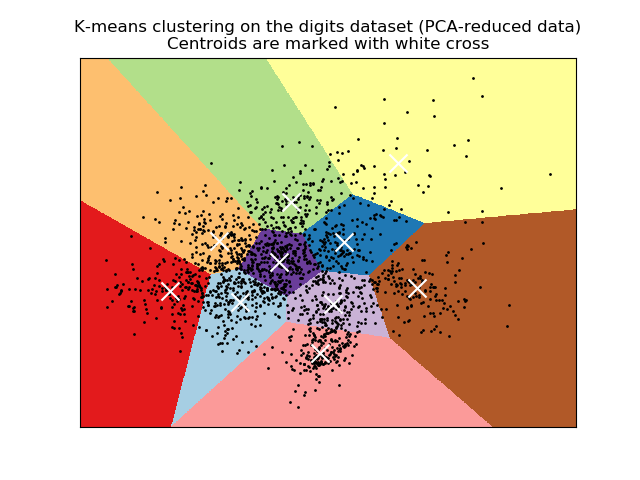

### Convergence of K-Means Clustering

* Given enough time K-means should converge. 
* However K-means can get stuck into local minima. So, do not rely on single iteration of K-means. We need to run it multiple times with different initializations.
* Different initialzations lead to different distance estiamats, which lead to different cluster analysis. This can help in generalizing after a few attempts.
* In sklearn this issue is addressed using the `init` parameter.
* Set `init='k-means++` which will use the improvized initialization scheme.
* This initializes the centroids distant from each other, leading to better results than random initialization. 

### Some other points

* The algorithm supports sample weights, which can be given by a parameter sample_weight. 
* This allows to assign more weight to some samples when computing cluster centers and values of inertia. 
* For example, assigning a weight of 2 to a sample is equivalent to adding a duplicate of that sample to the dataset


* A parameter can be given to allow K-means to be run in parallel, called n_jobs. Giving this parameter a positive value uses that many processors (default: 1). * A value of -1 uses all available processors, with -2 using one less, and so on. 
* Parallelization generally speeds up computation at the cost of memory (in this case, multiple copies of centroids need to be stored, one for each job).

## Code

* K-means works quite well in most of the situations. 
* This example illustrates where K-means does not work intuitively.
* This does not mean that K-means is a bad algorithm, we need to use it considering the data which is given to us.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [0]:
n_samples = 1500
random_state = 170
X,y = make_blobs(n_samples = n_samples, random_state = random_state)

In [0]:
print(X.shape, y.shape)

(1500, 2) (1500,)


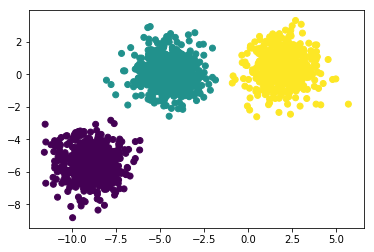

In [0]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

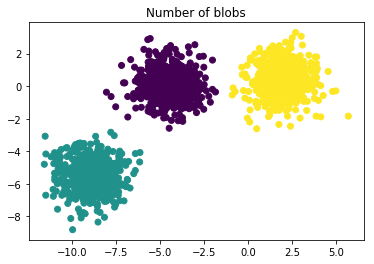

In [0]:
k_mcluster = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_jobs = -1, random_state = random_state)
y_pred = k_mcluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.title("Number of blobs")
plt.show()

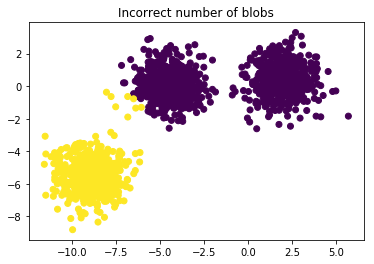

In [0]:
# We can get wrond predictions if we do not segment them into desired number of clusters
k_mcluster_wrong = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 500, n_jobs = -1, random_state = random_state)
y_pred = k_mcluster_wrong.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.title("Incorrect number of blobs")
plt.show()

In [0]:
# Problems with Anisotropic Data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
k_means_aniso = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_jobs = -1, random_state = random_state)
y_pred = k_means_aniso.fit_predict(X_aniso)

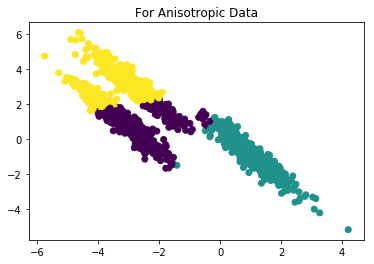

In [0]:
plt.scatter(X_aniso[:,0], X_aniso[:,1], c = y_pred)
plt.title("For Anisotropic Data")
plt.show()

In [0]:
# It works with data having different variance but this is unintiuative and not reliable
X_varied, Y_varied = make_blobs(n_samples = n_samples, cluster_std = [1.0,2.0,2.5], random_state=random_state)

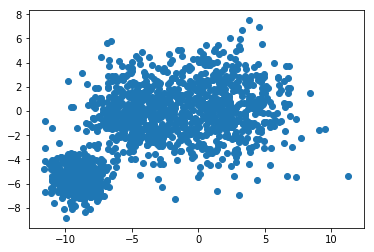

In [0]:
plt.scatter(X_varied[:,0], X_varied[:,1])
plt.show()

In [0]:
K_M_varied = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, random_state=random_state, n_jobs = -1)
y_pred = K_M_varied.fit_predict(X_varied)

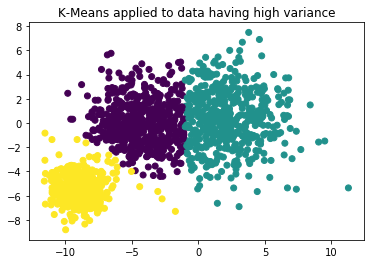

In [0]:
plt.scatter(X_varied[:,0], X_varied[:,1], c = y_pred)
plt.title("K-Means applied to data having high variance")
plt.show()

# Mini-Batch K-Means

## How is this different ?

* `Mini_batch_KMeans` is a variant of `KMeans` which uses mini-batches to reduce the computation time while still attempting to optimize the same objective function.
* Mini-batches are subsets of input data, randomly sampled in each training iteration.
* These mini-batches reduce the amount of computation required to converge to local solution.
* Mini-batch K-means produces results that are slightly worse than the standard algorithm.

## Learning Algorithm

* This algorithm executes two major steps similar to vanilla k-means.
* In first step $ b $ samples are drawn randomly from the dataset, to form a mini-batch.
* These are assigned to the nearest centroid.
* In second step, the centroids are updated. In contrast to k-means this is done on a per-sample basis.
* For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples are assigned to that centroid.
* This has an effect of decreasing the rate of change for a centroid over time.
* These steps are performed untill convergence is achieved or till the pre-determined interations are reached.

* `MiniBatchKMeans` converges faster than `KMeans` but the quality of result is reduced.
* In practice this result quality may make a small difference.

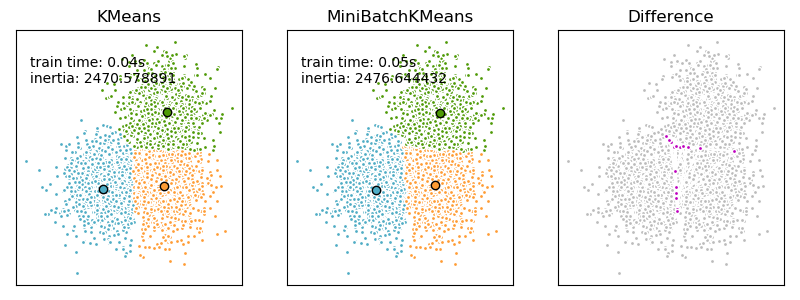

# Affinity-Propogation based Cluster Analysis

* `Affinity-Propgation` creates clusters by sending messages between pairs of samples until convergence.
* A dataset is then described using a samll number of exemplars.
* Exemplars are indentified as most representive of other samples.
* The message sent between the pairs represent the suitabilit of one sample to be the exemplar of the other.
* This updating happens till convergence at which the point the final exemplars are choosen and we get the final clustering.

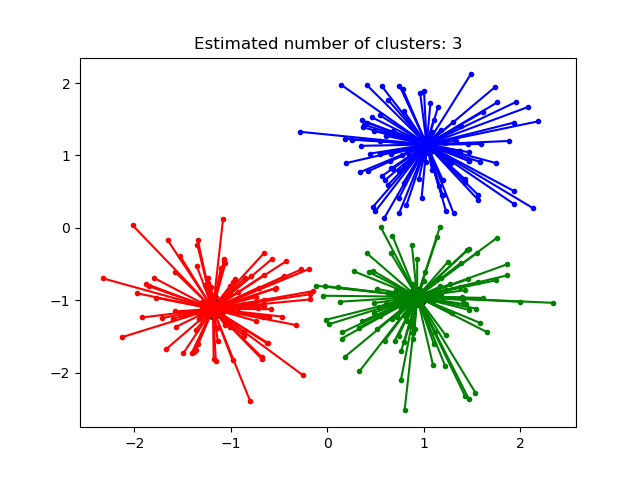

* Affinity propogation can be interesting as it chooses the number of clusters based on the data provided.
* The two important parameters passed here are preference which controls how many exemplars need to be used and the damping factor which clamps the responsibility and availability of messages.


* The main drawback of Affinity propogation is its complexity, the algorithm has a complexity of O($ N ^ 2 $ $ T $), where $ N $ is the number of samples and $ T $ is the number of iterations until converegence. 

# Mean-Shift Clustering

## Learning Algorithm

* `MeanShift ` clustering aims to discover blobs in smooth density of samples.
* It is a centroid based algorithm which works by updating candidates for centroids to be the mean of the points within a given region.
* The candidates are then filtered in a post-processing stage to eliminate near-duplication to form final set of centroids.
* Given a centroid $ x_i $ for iteration $ t $, the candidate is updated according to the following equation.
* $ x_i^{t+1} = m(x_i^t) $

* Where $N(x_i) $ is the neighborhood of samples within a given distance around and is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points. 

* This is computed using the following equation, effectively updating a centroid to be the mean of the samples within its neighborhood:

$ m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)} $

* The algorithm automatically sets the number of clusters, instead of relying on a parameter `bandwidth`, which dictates the size of the region to search through.
* This paramter can be set manually, but can be estimated using the provided `estimate_bandwidth ` function

* Note: -
* This algorithm is not highly scalable.
* It required multiple nearest neighbour searches to converge.
* Algorithm will stop iterating once it has converged.
* This algorithm is guarenteed to converge, once centroids stop moving.
* Labelling is performed by finding the nearest centroid for a given sample.

## Code

In [0]:
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1,1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])
clustering = MeanShift(bandwidth = 2).fit(X)

In [0]:
clustering.labels_

array([1, 1, 1, 0, 0, 0])

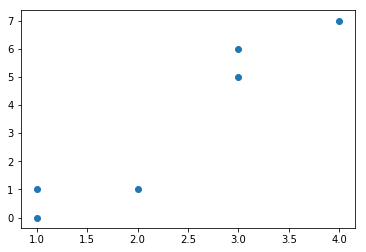

In [0]:
# How the data is given
plt.scatter(X[:,0], X[:,1])
plt.show()

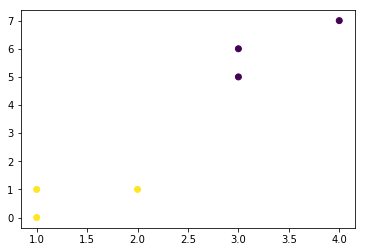

In [0]:
# How mean_shift clusters the data
plt.scatter(X[:,0], X[:,1], c = clustering.labels_)
plt.show()

In [0]:
clustering.predict([[0,0], [5,5]])

array([1, 0])

# Spectral Clustering

## Introduction

* `SpecralClustering` does a low-dimesnsional embedding of the affinity matrix between samples, followed by a K-Means in the low dimensional space.
* It is efficient if the affinity matrix is sparse.
* For two clusters, it solves a convex relaxation of the normalized cuts problem on the similarity graph.
* Cutting the graph into two so that the weights of the edges is samll compared to the weights of the edges inside each cluster.
* This creteria is interesting when working on images. 
* Graph vertices are pixels and edges of the similarity graph are function of gradient of the image.

* In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. 

* For instance when clusters are nested circles on the 2D plane.

* If affinity is the adjacency matrix of a graph, this method can be used to find normalized graph cuts.

## Code

In [0]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[1,1], [2,1], [1,0],
              [4,7], [3,5], [3,6]])
clustering = SpectralClustering(n_clusters = 2, assign_labels = 'discretize', random_state = 0)

In [0]:
clustering = clustering.fit(X)

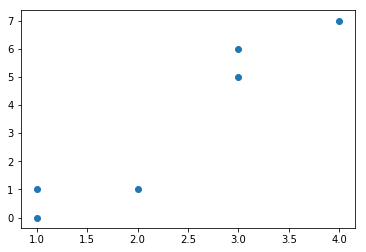

In [0]:
# Given input data
plt.scatter(X[:,0], X[:,1])
plt.show()

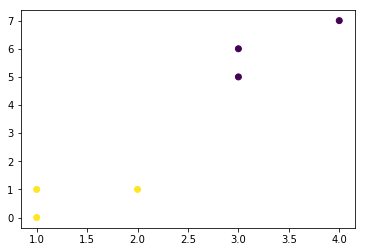

In [0]:
labels = clustering.labels_
plt.scatter(X[:,0], X[:,1], c = labels)
plt.show()
# print(labels)

**Label Assignment Strategies: -**
* Different strategies can be used for label assignment. 
* `kmeans` strategy can match finer details of the data but is unstable.
* `discretize` strategy is 100 % reproducable but it creates fairly even and geometric clusters.

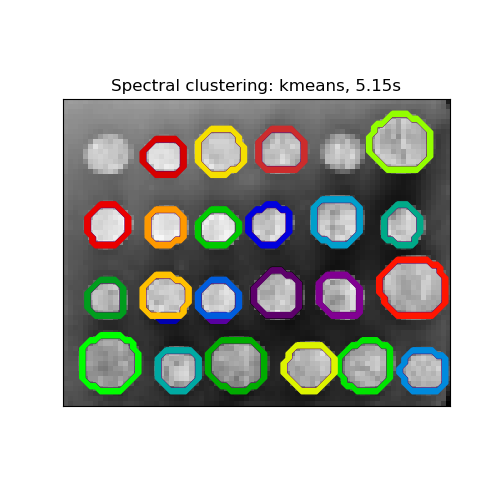

# Hierarchical Clustering

## Introduction

* Hierarchical clustering is a family of algorithms that build nested clusters by merging or splitting successively.
* The hierarchy is represented as a tree or dendogram.
* The root of the tree is unique cluster that gathers all the samples, the leaves being clusters with one sample.

## Merging strategy

* `AgglomerativeClustering` object performs hierarchical clustering using a bottom up approach.
* Each observation starts with its own cluster and clusters are merged successively.
* Linkage criteria determines the metric to be used for the merge strategy.

* Ward:- Minimizes the sum of squared differences within all clusters. It is variance minimizing approach and is similar to k-means algorithm objective function but tackled with hierarchical approach

* Maximum or Complete Linkage: - Minimizes the maximum distance between observation of pairs of clusters.

* Average linkage: - Minimizes the average of the distances between all observations of pairs of clusters.

* Single Linkage: - Minimzes the distance between the closest observation of pairs of clusters.

* Agglomerative clustering can scale to large number of samples when it is jointly used with a connectivity matrixm, but is computationally more expensive when no connectivity constraints are provided.

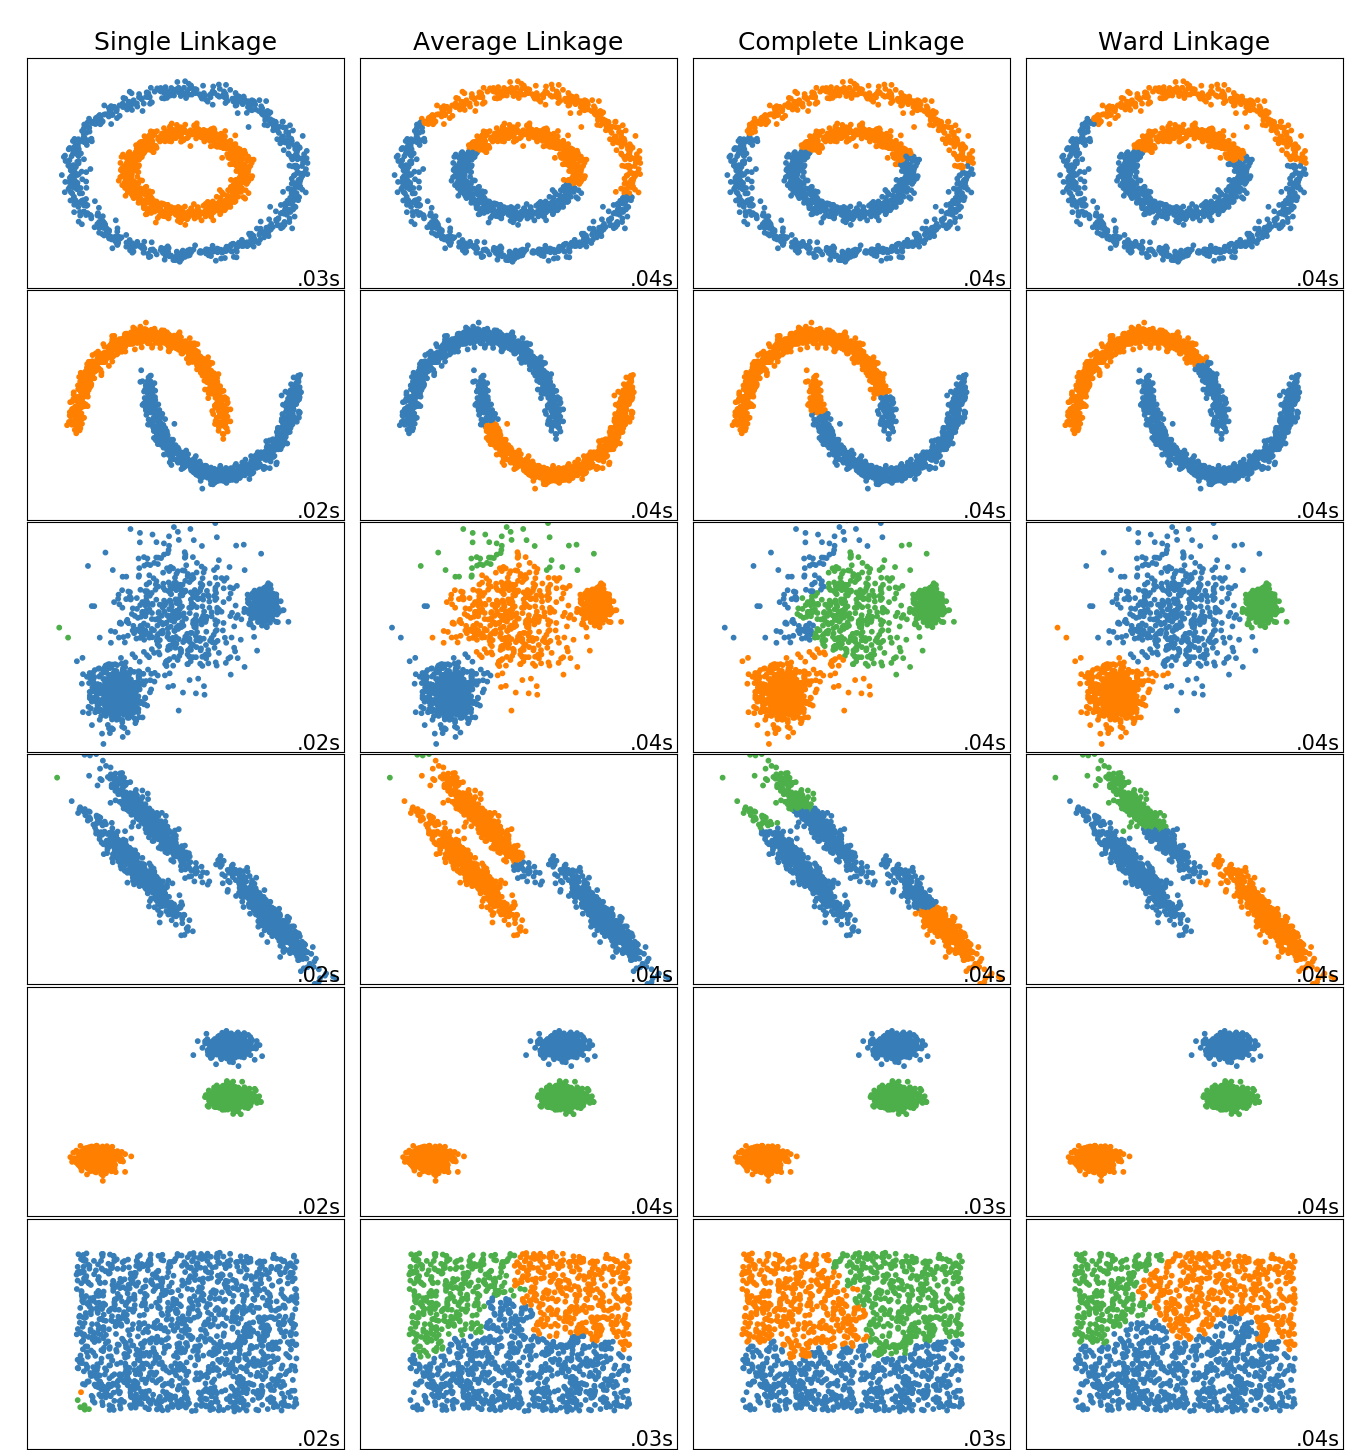

* `Sklearn.AgglomerativeClustering` supports all the above linkages.
* Agglomerative clustering has a rich get richer behaviour that leads to unveven cluster sizes.
* Single link cluster is worst in this regard, ward gives most regular sizes.
* Distance cannot be vaired in Ward, for non-Euclidean distances average linkage is best choice.
* Single linkage is not robust to noisy data.
* Single linkage can be computed efficiently and can provide hierarchical clustering of larger datasets.
* Single linkage can perform well on non-globular data.

## Code

Refer here for complete set of parameters
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#

In [0]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [0]:
X,y = make_blobs(n_samples = 1000, n_features = 2, random_state = 2)

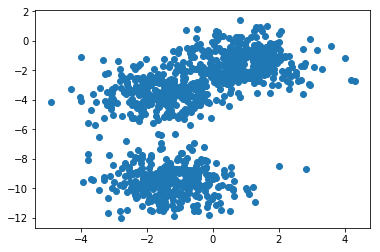

In [0]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [0]:
n_clusters = 3
linkage_list = ["ward", "complete", "average", "single"]
cmap = ['r','g','b']

Linkage used here is:  ward


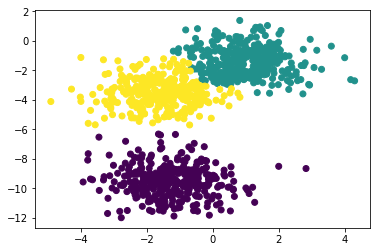

Linkage used here is:  complete


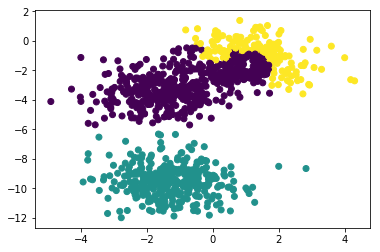

Linkage used here is:  average


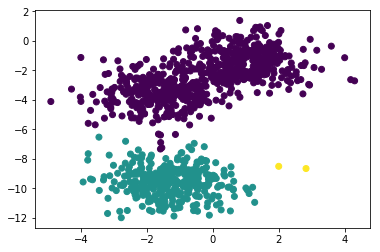

Linkage used here is:  single


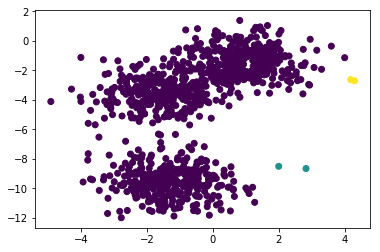

In [0]:
for linkage in linkage_list:
    cluster = AgglomerativeClustering(n_clusters = n_clusters, linkage=linkage)
    cluster.fit(X)
    labels = cluster.labels_
    print("Linkage used here is: ", linkage)
    plt.scatter(X[:,0], X[:,1], c = labels)
    plt.show()


## Adding connectivity constraints

* Connectivity constraints can be added to this algorithm adjacent clusters can be merged together.

* Connectivity constraints are useful to impose in certain local structure but they also make the algorithm faster, especially when the number of the samples is high.

* The connectivity constraints are imposed via an connectivity matrix.


## Choosing the metric

* Single, average and complete linkage can be used with a variety of distances (or affinities), in particular Euclidean distance (l2), Manhattan distance (or Cityblock, or l1), cosine distance, or any precomputed affinity matrix.

* l1 distance is often good for sparse features, or sparse noise: i.e. many of the features are zero, as in text mining using occurrences of rare words.
* cosine distance is interesting because it is invariant to global scalings of the signal.

The guidelines for choosing a metric is to use one that maximizes the distance between samples in different classes, and minimizes that within each class.

# Density Based Clustering

## DBSCAN

### Theory

* ` DBSCAN ` algorithm views clusters as areas of high density seperated by areas of low density.

* Due to this generic view clusters formed by DBSCAN can be of any shape as opposed to k-means where the clusters had to be necessarily of convex shape.

* Central component of DBSCAN is concept of core samples where samples are having high density.

* Cluster here is thus a set of core samples each close to each other and set of non-core samples that are close to a core sample.

* There are two hyper-paramters in this algorithm ` min_samples ` and ` eps `.

* Higher ` min_samples ` or lower ` eps ` indicate higher desnity is required to form cluster.

* Formally we define the core sample as being a sample in the dataset such that there exists ` min_samples ` within a distance of ` eps ` which are defined as neighbours of the core sample.

* This tells us that core sample is in dense area of vector space.

* A cluster is set of core samples that can be built by recursively taking the core sample, finding all the neighbours that are core samples, then finding the nieghbors of these neighbors and so on.

* A cluster has a core sample and a set of non-core samples that are neigbors of the core sample but they are not core samples. They lie within the fringe of the cluster.


* Any core sample is part of cluster. Any sample that is not a core sample or within the range of ` eps ` is called as an outlier by the algorithm.

* Parameter ` min_samples ` controls how tolerant is DBSCAN towards noise. The paramter ` eps ` is crucial to choose appropriately for the given dataset. 

* If ` eps ` is choosen too small then most of the data points will not be clustered at all.

* If ` eps ` is choosen too large then everything will fall into one cluster.

* To fix this ` eps ` value one can use the **knee** method.




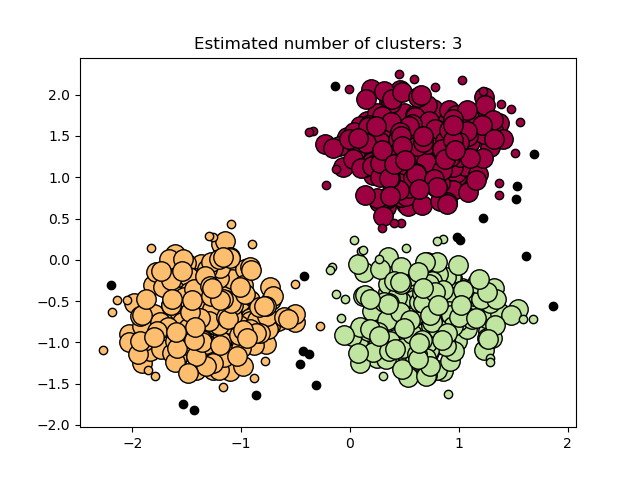

### Code

In [0]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([
              [1,2], [2, 2], [3, 5], [-1, 0],[3,4], [4,4], [-2,0], [-2,-1], [4, 5], [6, -2], [2,3], [-3, 1]
])

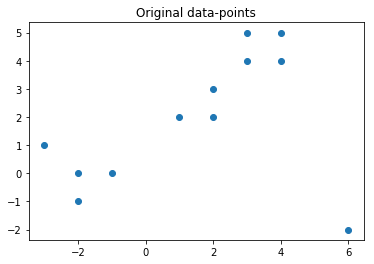

In [0]:
plt.scatter(X[:,0], X[: ,1])
plt.title("Original data-points")
plt.show()

In [0]:
db = DBSCAN(eps = 1, min_samples = 3, metric = 'euclidean')
db.fit(X)
labels = db.labels_
print(labels)

[ 0  0  1  2  1  1  2  2  1 -1  0 -1]


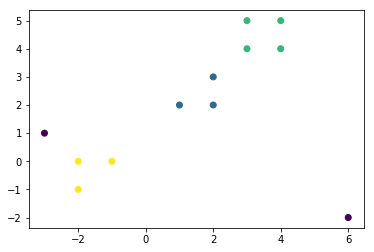

In [0]:
plt.scatter(X[:,0], X[:, 1], c = labels)
plt.show()

## OPTICS

### Theory

* The ` OPTICS ` algorithm shares many similarities with the ` DBSCAN ` algorithm and can be seen as a generalization of the DBSCAN algorithm that relaxes ` eps ` criteria.

* Here we can give a range for ` eps ` rather than giving a fixed value as in DBSCAN.

* The key difference between `OPTICS` and ` DBSCAN ` is that. ` OPTICS ` builds a _reachability_ graph, which assigns each sample both a ` reachability ` distance and a spot within the cluster ` ordering ` attribute.

* These two attributes are assigned when the model is fitted and are used to determine cluster membership.

* IF ` OPTICS ` is run with default paramters then ` DBSCAN ` style cluster can be performed in linear time.

* The reachability distances generated by OPTICS allow for variable density extraction of clusters within a single data set. 

* As shown in the below plot, combining reachability distances and data set ordering_ produces a reachability plot, where point density is represented on the Y-axis, and points are ordered such that nearby points are adjacent. 

` OPTICS ` is better suited than ` DBSCAN ` for large datasets

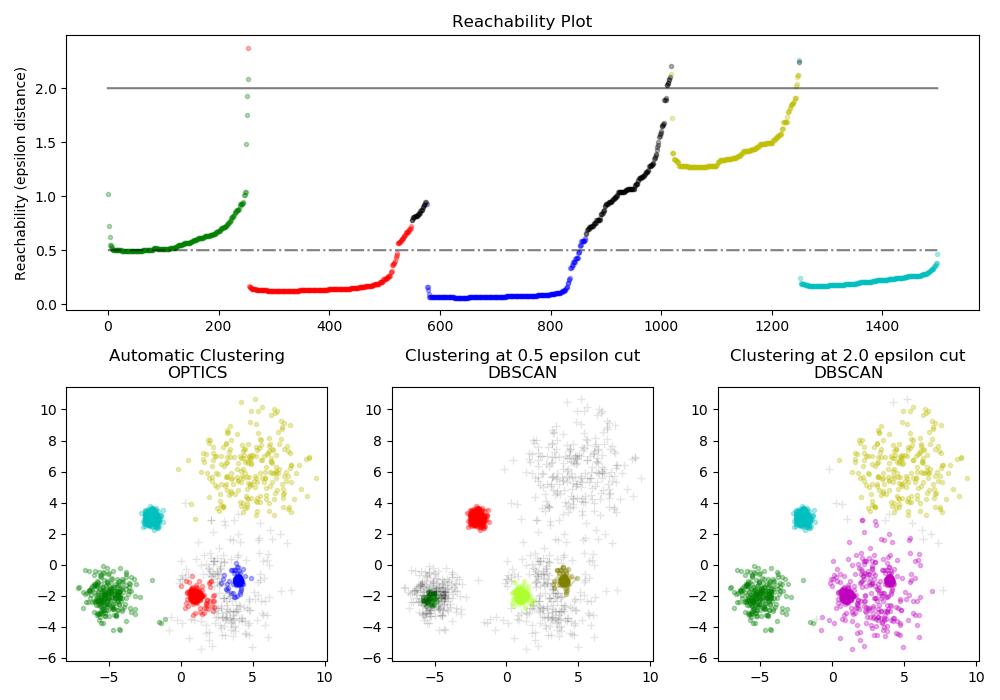

### Code

In [0]:
from sklearn.cluster import OPTICS

In [0]:
X = np.array([
              [1,2], [2, 2], [3, 5], [-1, 0],[3,4], [4,4], [-2,0], [-2,-1], [4, 5], [6, -2], [2,3], [-3, 1]
])

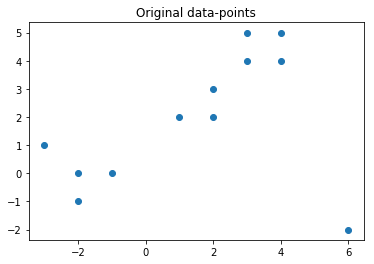

In [0]:
plt.scatter(X[:,0], X[: ,1])
plt.title("Original data-points")
plt.show()

In [0]:
op = OPTICS(min_samples = 3, max_eps = 2, metric = 'minkowski')
op.fit(X)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30, max_eps=2,
       metric='minkowski', metric_params=None, min_cluster_size=None,
       min_samples=3, n_jobs=None, p=2, predecessor_correction=True, xi=0.05)

In [0]:
labels = op.labels_

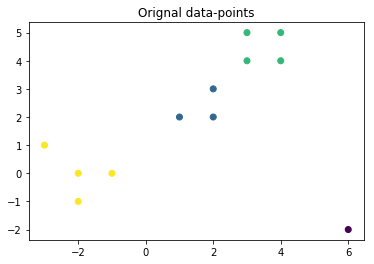

In [0]:
plt.scatter(X[:,0], X[:, 1], c = labels)
plt.title("Orignal data-points")
plt.show()

# BIRCH Algorithm

## Theory

* `BIRCH` builds a tree called the Characteristic Feature Tree (CFT) for the given data.

* The data is essentially lossy compressed to a set of Characterstic Feature nodes (CF Nodes) .

* The CF Nodes have a number of subclusters called Characteristic Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

The CF Subclusters hold the necessary information for clustering which prevents the need to hold the entire input data in memory. This information includes:

    Number of samples in a subcluster.
    Linear Sum - A n-dimensional vector holding the sum of all samples
    Squared Sum - Sum of the squared L2 norm of all samples.
    Centroids - To avoid recalculation linear sum / n_samples.
    Squared norm of the centroids.




* This algorithm can be viewed as an instance or data reduction method, since it reduces the input data to a set of subclusters which are obtained directly from the leaves of the CFT. 
* This reduced data can be further processed by feeding it into a global clusterer. 
* This global clusterer can be set by n_clusters. If n_clusters is set to None, the subclusters from the leaves are directly read off, otherwise a global clustering step labels these subclusters into global clusters (labels) and the samples are mapped to the global label of the nearest subcluster.

**Algorithm description:**

* A new sample is inserted into the root of the CF Tree which is a CF Node. It is then merged with the subcluster of the root, that has the smallest radius after merging, constrained by the threshold and branching factor conditions. If the subcluster has any child node, then this is done repeatedly till it reaches a leaf. After finding the nearest subcluster in the leaf, the properties of this subcluster and the parent subclusters are recursively updated.
* If the radius of the subcluster obtained by merging the new sample and the nearest subcluster is greater than the square of the threshold and if the number of subclusters is greater than the branching factor, then a space is temporarily allocated to this new sample. The two farthest subclusters are taken and the subclusters are divided into two groups on the basis of the distance between these subclusters.
* If this split node has a parent subcluster and there is room for a new subcluster, then the parent is split into two. If there is no room, then this node is again split into two and the process is continued recursively, till it reaches the root.

**Birch or MiniBatchKMeans?**
* Birch does not scale very well to high dimensional data. As a rule of thumb if n_features is greater than twenty, it is generally better to use MiniBatchKMeans.
* If the number of instances of data needs to be reduced, or if one wants a large number of subclusters either as a preprocessing step or otherwise, Birch is more useful than MiniBatchKMeans.



## Code

In [0]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[0, 1], [0.3, 1], [-0.3, 1], [0, -1], [0.3, -1], [-0.3, -1]])
brc = Birch(branching_factor = 50, n_clusters = 3, compute_labels = True)
# print(X[:,0])

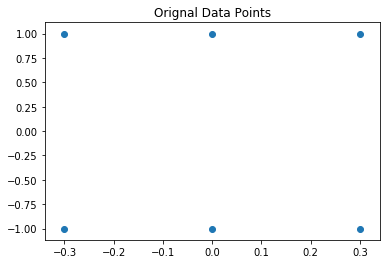

In [0]:
plt.scatter(X[:,0], X[:,1])
plt.title("Orignal Data Points")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


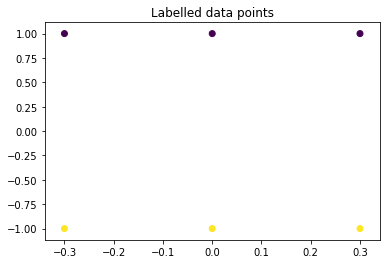

In [0]:
brc.fit(X)
plt.scatter(X[:,0], X[:,1], c = brc.labels_)
plt.title("Labelled data points")
plt.show()

# Clustering Performance Evalutation

* Evaluating a clustering algorithm is not simple. This is a task of unsupervised learning unlike supervised one.

* We do not have the notions of accuracy, precision or such terms as we do not have labeled data.

* Clustering is often called as ill-posed problem by statisticians. Hence finding a suitable metric is very hard.

* We have numerous metrics here, I list some of them here.

* Some of these methods assume that we have labelled data that is we know the cluster labels apriori but do not wish to disclose to them to clustering algorithm.
* We want to **evalutate** against these ground truths. Not use ground truths for clustering

## Adjusted Rand Index

* Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred.
* The adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:

In [0]:
from sklearn import metrics

In [0]:
labels_true = [0,0,0,1,1,1]
labels_pred = [0,0,0,1,1,2]

In [0]:
print(metrics.adjusted_rand_score(labels_true, labels_pred))

0.7058823529411765


* One can permute $ 0 $ and $ 1 $ in the predicted labels, rename 2 to 3 and get the same score.
* This makes rand_score a bit robust to clustering.

In [0]:
labels_pred = [1,1,1,0,0,3]
print(metrics.adjusted_rand_score(labels_true, labels_pred))

0.7058823529411765


* Also the adjusted_rand_score is symmetric. It won't matter if I reverse the order

In [0]:
print(metrics.adjusted_rand_score(labels_pred, labels_true))

0.7058823529411765


* Perfect classification have a score of 1.0

In [0]:
labels_pred = labels_true[:]
print(metrics.adjusted_rand_score(labels_pred, labels_true))

1.0


* Independent observations are close to 0.

In [0]:
labels_pred = [3,4,2,1,0,2]
print(metrics.adjusted_rand_score(labels_pred, labels_true))

-0.12903225806451613


- **Advantages**
- Random (uniform) label assignments have a ARI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Rand index or the V-measure for instance).
- Bounded range [-1, 1]: negative values are bad (independent labelings), similar clusterings have a positive ARI, 1.0 is the perfect match score.
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes

- **Disadvantages**

- Contrary to inertia, ARI requires knowledge of the ground truth classes while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

- However ARI can also be useful in a purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection (TODO).
